                         ################################# Libraries #################################

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from patsy import dmatrices
from sklearn import metrics
import matplotlib.pylab as plb
from sklearn.metrics import r2_score

                          #################################Data Extraction#################################

In [300]:

df = pd.read_csv('C:\\Users\\shree\\OneDrive\\Documents\\Quarter 5\\Capstone\\AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


                          #################################Data Cleaning#################################

In [324]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [302]:
not_available = "Not Available"
df['name'].fillna(not_available,inplace =True)
df['host_name'].fillna(not_available,inplace =True)

In [303]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [304]:
# Shape of the dataset
df.shape

(48895, 16)

                          #################################Descriptive Statistics#################################

In [325]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


                          #################################Data Cleaning#################################

In [326]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

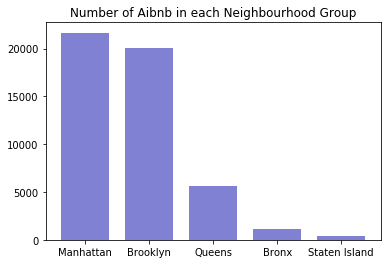

In [307]:
#Graph 1: Number of AIRBNB in each neighbourhood group
neighbourhood_grp = df['neighbourhood_group']
neighbourhood_grp
neighbourhood_grp.unique()
x = neighbourhood_grp.value_counts().index
y = neighbourhood_grp.value_counts().values
barwidth = 0.75
plt.bar(x,y, width= barwidth, color = "#0504aa", alpha =0.5)
plt.title("Number of Aibnb in each Neighbourhood Group")
plt.show()

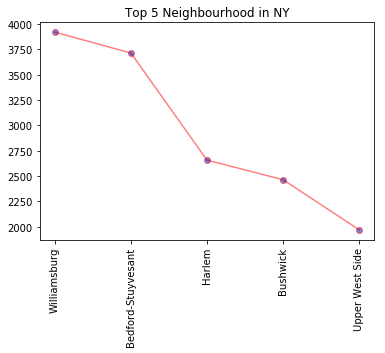

In [308]:
#Graph 2: Top 5 Neighbourhood in NY
neighbourhood = df['neighbourhood']
neighbourhood
neighbourhood_names = [neighbourhood.value_counts().index[0],neighbourhood.value_counts().index[1],neighbourhood.value_counts().index[2],neighbourhood.value_counts().index[3],neighbourhood.value_counts().index[4]]
neighbourhood_names
neighbourhood_count = [neighbourhood.value_counts().values[0],neighbourhood.value_counts().values[1],neighbourhood.value_counts().values[2], neighbourhood.value_counts().values[3],neighbourhood.value_counts().values[4]]
neighbourhood_count

plt.plot(neighbourhood_names,neighbourhood_count,color = "red", marker='o',alpha =0.5, markerfacecolor='#0504aa', markersize=6)
plt.xticks(rotation=90)

plt.title("Top 5 Neighbourhood in NY")
plt.show()

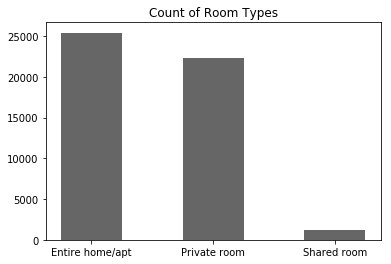

In [309]:
#Graph 3: Count of Room Types
room_typ = df['room_type']
room_typ
room_typ.unique()
x = room_typ.value_counts().index
y = room_typ.value_counts().values
barwidth = 0.5
plt.bar(x,y, width= barwidth, color = "black", alpha =0.6)
plt.title("Count of Room Types")
plt.show()

In [310]:
#Graph 4: 
#limit = 100z
#price_1000 = df[df.price < limit]
#price_1000
#df.boxplot(by ='neighbourhood_group', column ='price', grid = False) 
#plt.show()

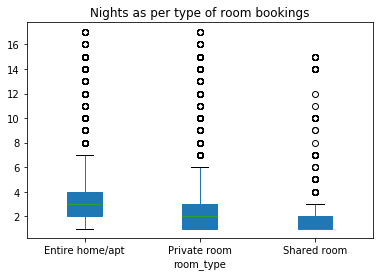

In [311]:
#Graph 4: Boxplot: Nights as per type of room bookings
nightlimit = 18
newdf = df[df.minimum_nights < nightlimit]
newdf.boxplot(by="room_type",column="minimum_nights",grid =False,patch_artist=True)
plt.title("Nights as per type of room bookings")
plt.suptitle("")
plt.show()

In [312]:
# Correlation
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


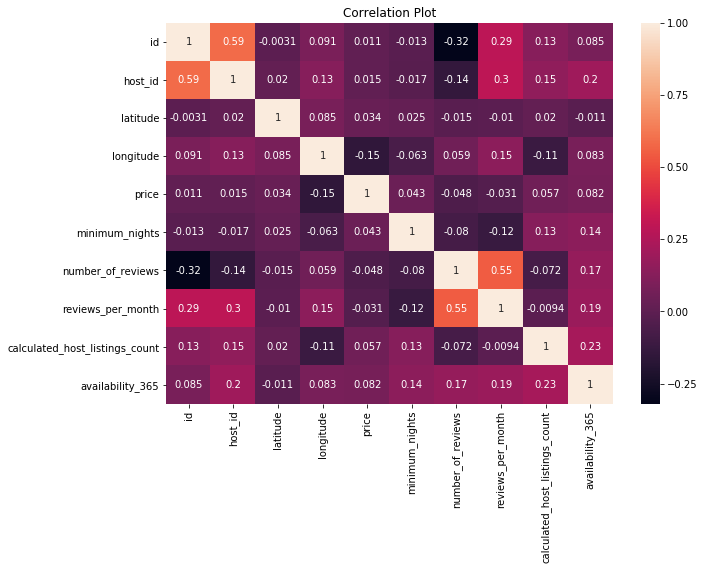

In [313]:
#Graph 5: Correlation Plot
plt.figure(figsize=(10,7))
ax = sns.heatmap(df.corr(),annot=True).set_title("Correlation Plot")

                      #################################Descriptive/Predictive Analytics#################################

In [314]:
#First Linear Regression Model 
lm = LinearRegression()
x = df.loc[:, df.columns != 'price']
x = x.drop(["name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"], axis=1)
x['code_neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0] + 1
x['code_neighbourhood'] = pd.factorize(df['neighbourhood'])[0] + 1
x['code_room_type'] = pd.factorize(df['room_type'])[0] + 1
x['reviews_per_month']=x['reviews_per_month'].replace(np.nan, 0)

y = df['price']

#print("y:{}".format(y.shape))
#print("x:{}".format(x.shape))
#y.head(5)

traindf, testdf, train_price, test_price = train_test_split(x, y, test_size=0.3, random_state=520)
lm.fit(traindf,train_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [315]:
predict_price = lm.predict(testdf)
print(predict_price)

[ 94.18701736 239.6314015  142.31913664 ... 115.85512656 202.49751002
 139.1482794 ]


In [332]:
np.sqrt(metrics.mean_squared_error(test_price, predict_price))

239.42556706847387

In [317]:
#Second Linear Regression Model 
lm1 = LinearRegression()
x1 = df.loc[:, df.columns != 'price']
x1 = x1.drop(["id","host_id","name","host_name","neighbourhood_group","neighbourhood","room_type","last_review"], axis=1)
x1['code_neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0] + 1
x1['code_neighbourhood'] = pd.factorize(df['neighbourhood'])[0] + 1
x1['code_room_type'] = pd.factorize(df['room_type'])[0] + 1
x1['reviews_per_month']=x['reviews_per_month'].replace(np.nan, 0)

y1 = df['price']

#print("y:{}".format(y.shape))
#print("x:{}".format(x.shape))
#y.head(5)

traindf1, testdf1, train_price1, test_price1 = train_test_split(x1, y1, test_size=0.3, random_state=520)
lm1.fit(traindf1,train_price1)
predict_price1 = lm1.predict(testdf1)
print(predict_price1)
np.sqrt(metrics.mean_squared_error(test_price1, predict_price))

[ 88.31078252 233.30190569 148.78330083 ... 118.28932332 205.59535817
 135.11785166]


239.42556706847387

In [321]:
actual_price = np.array(test_price)
predict_price

actualvspredict_df = pd.DataFrame(actual_price,predict_price)
#actualvspredict_df

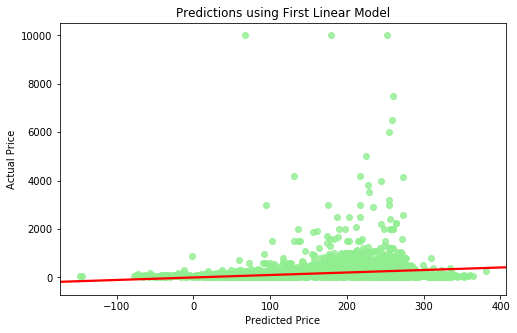

In [319]:
plt.figure(figsize=(8,5))
sns.regplot(predict_price,test_price,scatter_kws={"color": "lightgreen"},line_kws={"color": "red"})
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Predictions using First Linear Model")
plt.grid(False)
plt.show()

In [320]:
df.dtypes
#1 graph,corr plot,model,prediction, prediction graph, writing, github.

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object